# Import libraries

In [98]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Import dataset

In [81]:
df=pd.read_csv('data immobilier.csv')

In [82]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
df.shape

(1460, 81)

# Step 1 : Exploratory Data Analysis and Preprocessing

In [4]:
print('The DataFrame contains {} lines and {} columns.'.format(df.shape[0],df.shape[1]))

The DataFrame contains 1460 lines and 81 columns.


In [48]:
cpt=0
for i in df.dtypes:
    if i != type(object):
        cpt+=1
        
print(f"The dataframe contains {cpt} numerical columns and {df.shape[1]-cpt} non numerical columns") # nb colonnes contenant valeurs numériques

The dataframe contains 38 numerical columns and 43 non numerical columns


In [49]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
print('Nombre de valeurs nulles colonnes :\n')
for col in df.columns:
    res = sum(df[col].isnull())
    if res>0:
    
        print(f'    - {col} : {res}')

Nombre de valeurs nulles colonnes :

    - LotFrontage : 259
    - Alley : 1369
    - MasVnrType : 8
    - MasVnrArea : 8
    - BsmtQual : 37
    - BsmtCond : 37
    - BsmtExposure : 38
    - BsmtFinType1 : 37
    - BsmtFinType2 : 38
    - Electrical : 1
    - FireplaceQu : 690
    - GarageType : 81
    - GarageYrBlt : 81
    - GarageFinish : 81
    - GarageQual : 81
    - GarageCond : 81
    - PoolQC : 1453
    - Fence : 1179
    - MiscFeature : 1406


In [8]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['SalePrice'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
col_names=[]
for x in df.columns:
    col_names.append(x)

In [13]:
# voir le contenu des colonnes
index=0
for i in (df.loc[0]):
    print(str(col_names[index])+" : "+str(i))
    index+=1

Id : 1
MSSubClass : 60
MSZoning : RL
LotFrontage : 65.0
LotArea : 8450
Street : Pave
Alley : nan
LotShape : Reg
LandContour : Lvl
Utilities : AllPub
LotConfig : Inside
LandSlope : Gtl
Neighborhood : CollgCr
Condition1 : Norm
Condition2 : Norm
BldgType : 1Fam
HouseStyle : 2Story
OverallQual : 7
OverallCond : 5
YearBuilt : 2003
YearRemodAdd : 2003
RoofStyle : Gable
RoofMatl : CompShg
Exterior1st : VinylSd
Exterior2nd : VinylSd
MasVnrType : BrkFace
MasVnrArea : 196.0
ExterQual : Gd
ExterCond : TA
Foundation : PConc
BsmtQual : Gd
BsmtCond : TA
BsmtExposure : No
BsmtFinType1 : GLQ
BsmtFinSF1 : 706
BsmtFinType2 : Unf
BsmtFinSF2 : 0
BsmtUnfSF : 150
TotalBsmtSF : 856
Heating : GasA
HeatingQC : Ex
CentralAir : Y
Electrical : SBrkr
1stFlrSF : 856
2ndFlrSF : 854
LowQualFinSF : 0
GrLivArea : 1710
BsmtFullBath : 1
BsmtHalfBath : 0
FullBath : 2
HalfBath : 1
BedroomAbvGr : 3
KitchenAbvGr : 1
KitchenQual : Gd
TotRmsAbvGrd : 8
Functional : Typ
Fireplaces : 0
FireplaceQu : nan
GarageType : Attchd
Garage

### Average sale price following the overall quality of the real estate

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

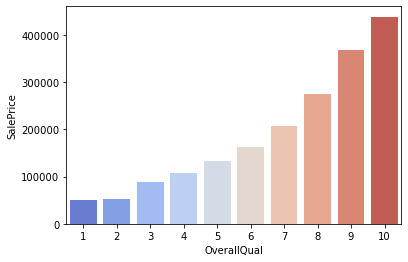

In [27]:
sns.barplot(df.groupby('OverallQual').mean()['SalePrice'].index,df.groupby('OverallQual').mean()['SalePrice'], palette='coolwarm')

### Average sale price following the year of construction of the real estate

<AxesSubplot:xlabel='YearBuilt'>

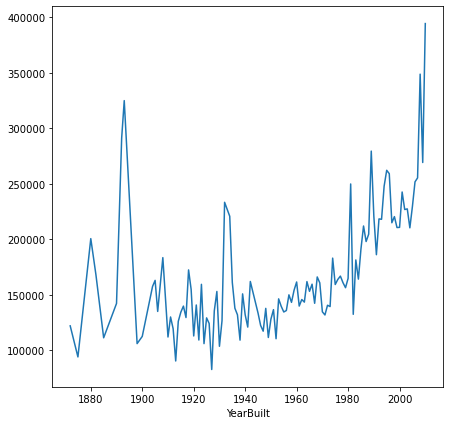

In [33]:
df.groupby('YearBuilt').mean()['SalePrice'].plot(figsize=(7,7))

# Step 2 : Data Preparation

In [50]:
col_obj=[]
for col in df:
    if df[col].dtypes == "object":
        col_obj.append(col)


In [84]:
df_final=df.drop(columns=col_obj)

In [85]:
initial_size = df_final.shape
print(initial_size)

(1460, 38)


In [86]:
df_final=df_final.dropna() # drop rows where we find na values, choose not to replace by 0 because it can falsify the model 

In [87]:
actual_size=df_final.shape 
print(actual_size)

(1121, 38)


In [88]:
print(f'There were {initial_size[0]-actual_size[0]} rows that were dropped because there were na values inside')

There were 339 rows that were dropped because there were na values inside


In [89]:
X=df_final.drop(['SalePrice'],axis=1)

In [90]:
y=df_final['SalePrice']

In [91]:
pd.DataFrame(y.describe())

,SalePrice
count,1121.000000
mean,185506.152542
std,82999.159004
min,35311.000000
25%,131000.000000
50%,164900.000000
75%,219500.000000
max,755000.000000


# Step 3 : Modeling & Tuning

In [107]:
#Libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
# check xgboost version
import xgboost

In [93]:
reporting={} #reporting of the models metrics

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

## Multiple Linear Regression

In [95]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [96]:
print('The equation of this Linear Regression has format : y= coefficient*Features + intercept')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

The equation of this Linear Regression has format : y= coefficient*Features + intercept
Linear model intercept: -1310736.9220768714 and the coefficients are: [-1.08728117e+00 -1.89360275e+02 -9.89740788e+01  4.67544123e-01
  1.83702486e+04  4.11944424e+03  3.55323272e+02  1.91359397e+02
  3.57348008e+01  4.51433994e+00  6.65789590e+00 -4.73996937e+00
  6.43226646e+00  1.39500220e+01  1.32558890e+01 -9.35038755e+00
  1.78555234e+01  1.10111941e+04  4.73070814e+03  7.39256941e+03
  9.19760647e+02 -6.94371318e+03 -1.79660885e+04  6.79100428e+03
  5.65061839e+03 -1.30907223e+02  1.36575103e+04  1.63922258e+01
  2.70813008e+01  1.24818269e+01  2.88141732e+01  4.94057087e+01
  6.43293937e+01 -1.63049403e+02 -8.39560822e-01 -3.20407482e+02
  2.13515033e+02]


In [102]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,round(train_set_rmse,2)))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,round(test_set_rmse,2)))

Linear model, R2 train score is : 0.798954321093985 and the train root mean square is: 35084.87
Linear model, R2 test score is : 0.8007136317640099 and the test root mean square is: 42390.18


In [100]:
reporting['Linear regression']=test_set_r2

### Random Forest Regressor 

In [108]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)

In [109]:
randomForestAlgo = RandomForestRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=80,stop=100, num=10)], 
         'max_depth' : [80,90,100],
         'min_samples_split':[4,8],
         'min_samples_leaf':[2,4],
         'bootstrap' : [True,False]
        }
gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train_Scaled,y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test_Scaled,y_test)

In [110]:

print('The best Random Forest R2 train score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_RandomForest.best_score_,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestRandomForest_testScore,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))

The best Random Forest R2 train score is : 0.80 with n estimators = 86.00, max depth : 100.00, min samples split : 4 and min samples leaf : 2  
 
The best Random Forest R2 test score is : 0.85 with n estimators = 86.00, max depth : 100.00, min samples split : 4 and min samples leaf : 2  
 


In [111]:
reporting['Random Forest Regression']=bestRandomForest_testScore

### XG Boost

In [115]:
xgboost_model = xgboost.XGBRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=80,stop=100, num=10)], 
         'max_depth' : [80,90,100],
        }
gridSearch_xgboost=GridSearchCV(xgboost_model,param,scoring='r2',cv=5)
gridSearch_xgboost.fit(X_train_Scaled,y_train)

best_xgboost=gridSearch_xgboost.best_estimator_
bestxgboost_testScore=best_xgboost.score(X_test_Scaled,y_test)

In [119]:
reporting['XG Boost regression']=bestxgboost_testScore

### Extra Trees

In [120]:
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=150,stop=170, num=10)], 
         'max_depth' : [90,100],
         'min_samples_split':[6,8],
         'min_samples_leaf':[3,4],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train_Scaled,y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test_Scaled,y_test)

In [121]:
print('The best Random Forest R2 score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_ExtraTrees.best_score_,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestExtrasTrees_testScore,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))

The best Random Forest R2 score is : 0.81 with n estimators = 150.00, max depth : 90.00, min samples split : 8 and min samples leaf : 4  
 
The best Random Forest R2 test score is : 0.82 with n estimators = 150.00, max depth : 90.00, min samples split : 8 and min samples leaf : 4  
 


In [122]:
reporting['Extra Trees Regressor']=bestExtrasTrees_testScore

# Reporting models results without minimum important features

In [123]:
df_results=pd.DataFrame()
df_results['model']=reporting.keys()
df_results['Score R2']=reporting.values()

In [124]:
df_results=df_results.set_index('model')

In [125]:
dfVizModels=pd.DataFrame(df_results['Score R2'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Score R2
model,
XG Boost regression,0.872517
Random Forest Regression,0.846871
Extra Trees Regressor,0.822541
Linear regression,0.800714


<br><br><br>
# Now Same process and same modelisation with important features

In [136]:
#Correlation of columns to the target
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['SalePrice'],columns=['Correlation to the target'])
list_col_important=df1Corr.index[:12]

In [138]:
df_final_important=df_final[list_col_important]
df_final_important.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt
0,208500,7,1710,2,548,856,856,2,8,2003,2003,2003.0
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0
2,223500,7,1786,2,608,920,920,2,6,2001,2002,2001.0
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1998.0
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0


In [139]:
X=df_final_important.drop(['SalePrice'],axis=1)

In [140]:
y=df_final_important['SalePrice']

# Modeling with important features

In [141]:
reporting_important={} #reporting of the models metrics

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

## Multiple Linear Regression

In [143]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [144]:
print('The equation of this Linear Regression has format : y= coefficient*Features + intercept')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

The equation of this Linear Regression has format : y= coefficient*Features + intercept
Linear model intercept: -1088772.475316159 and the coefficients are: [ 2.21621831e+04  3.41484523e+01  1.68756995e+04  1.51789495e+01
  1.51078187e+01  9.65700824e+00 -5.60527230e+03  4.04239900e+03
  2.94070360e+02  4.23492523e+02 -2.13454919e+02]


In [145]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,round(train_set_rmse,2)))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,round(test_set_rmse,2)))

Linear model, R2 train score is : 0.7540282288573278 and the train root mean square is: 39189.7
Linear model, R2 test score is : 0.7813613865614679 and the test root mean square is: 43837.29


In [146]:
reporting_important['Linear regression']=test_set_r2

### Random Forest Regressor 

In [147]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)

In [148]:
randomForestAlgo = RandomForestRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=80,stop=100, num=10)], 
         'max_depth' : [90,100],
         'min_samples_split':[4,8],
         'min_samples_leaf':[2,4],
         'bootstrap' : [True,False]
        }
gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train_Scaled,y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test_Scaled,y_test)

In [149]:

print('The best Random Forest R2 train score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_RandomForest.best_score_,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestRandomForest_testScore,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))

The best Random Forest R2 train score is : 0.80 with n estimators = 86.00, max depth : 100.00, min samples split : 4 and min samples leaf : 2  
 
The best Random Forest R2 test score is : 0.85 with n estimators = 86.00, max depth : 100.00, min samples split : 4 and min samples leaf : 2  
 


In [150]:
reporting_important['Random Forest Regression']=bestRandomForest_testScore

### XG Boost

In [151]:
xgboost_model = xgboost.XGBRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=80,stop=100, num=10)], 
         'max_depth' : [80,90,100],
        }
gridSearch_xgboost=GridSearchCV(xgboost_model,param,scoring='r2',cv=5)
gridSearch_xgboost.fit(X_train_Scaled,y_train)

best_xgboost=gridSearch_xgboost.best_estimator_
bestxgboost_testScore=best_xgboost.score(X_test_Scaled,y_test)

In [152]:
reporting_important['XG Boost regression']=bestxgboost_testScore

### Extra Trees

In [153]:
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=150,stop=170, num=10)], 
         'max_depth' : [90,100],
         'min_samples_split':[6,8],
         'min_samples_leaf':[3,4],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train_Scaled,y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test_Scaled,y_test)

In [154]:
print('The best Random Forest R2 score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_ExtraTrees.best_score_,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestExtrasTrees_testScore,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))

The best Random Forest R2 score is : 0.80 with n estimators = 165.00, max depth : 90.00, min samples split : 8 and min samples leaf : 4  
 
The best Random Forest R2 test score is : 0.85 with n estimators = 165.00, max depth : 90.00, min samples split : 8 and min samples leaf : 4  
 


In [155]:
reporting_important['Extra Trees Regressor']=bestExtrasTrees_testScore

# Reporting models results with minimum important features

In [156]:
df_results=pd.DataFrame()
df_results['model']=reporting_important.keys()
df_results['Score R2']=reporting_important.values()

In [157]:
df_results=df_results.set_index('model')

In [158]:
dfVizModels=pd.DataFrame(df_results['Score R2'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Score R2
model,
XG Boost regression,0.882891
Extra Trees Regressor,0.853611
Random Forest Regression,0.849791
Linear regression,0.781361
